In [1]:
# Notebook 02 : Détection d'Anomalies avec Machine Learning - Projet 5G mmWave

## 📥 1. Imports & Chargement des données préparées

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Rechargement des données enrichies depuis le notebook 01
file_path = "D:\\4DATA\SEMESTER2\PI\DATASET\mm-5G.csv"
df = pd.read_csv(file_path)


<>:10: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Souhayl\AppData\Local\Temp\ipykernel_1392\2776416170.py:10: SyntaxWarning: invalid escape sequence '\S'
  file_path = "D:\\4DATA\SEMESTER2\PI\DATASET\mm-5G.csv"


## 🧼 2. Nettoyage et re-feature engineering (si besoin)

In [3]:
# On recalcule les features comme dans le Notebook 01
# Pour plus de robustesse (au cas où le fichier CSV est brut)
df['debit_brut'] = df['Throughput']
df['debit_lisse'] = df['Throughput'].ewm(span=8, adjust=False).mean()
df['delta'] = df['debit_brut'] - df['debit_lisse']
df['variation_relative'] = df['delta'] / (df['debit_lisse'] + 1e-6)
df['slope_brut'] = df['debit_brut'].diff()
df['slope_lisse'] = df['debit_lisse'].diff()
df['seuil'] = df['delta'].rolling(window=15).std() * 1.5
df['is_anomaly'] = (df['delta'].abs() > df['seuil']).astype(int)


## 🧠 3. Sélection des variables explicatives

In [4]:
features = ['debit_brut', 'debit_lisse', 'delta', 'variation_relative', 'slope_brut', 'slope_lisse']
X = df[features].fillna(0)
y = df['is_anomaly']


## 🔀 4. Split des données

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 🌲 5. Entraînement d'un modèle Random Forest

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 📈 6. Évaluation du modèle

In [7]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[15236  1201]
 [ 1947  2052]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     16437
           1       0.63      0.51      0.57      3999

    accuracy                           0.85     20436
   macro avg       0.76      0.72      0.74     20436
weighted avg       0.84      0.85      0.84     20436



## 📊 7. Visualisation de l'importance des features

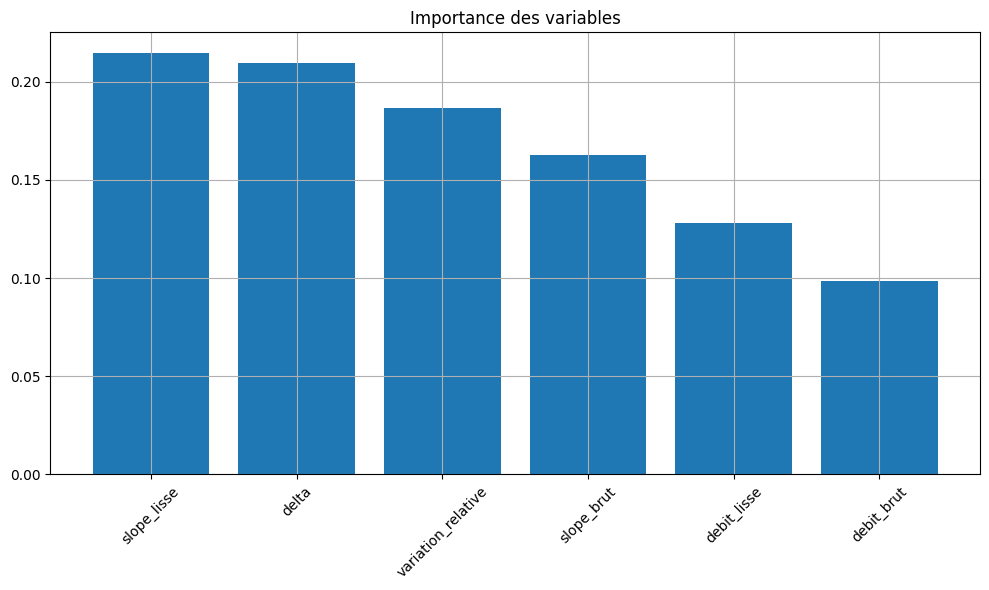

In [8]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Importance des variables")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


## 💾 8. Sauvegarde du modèle (optionnel)

In [9]:
import joblib
joblib.dump(model, "random_forest_anomaly_model.pkl")


['random_forest_anomaly_model.pkl']